# Mobile Phone App Button - Hypothesis Testing (A/B)

### Introduction

In this project, we aim to optimize user engagement on a mobile app by experimenting with a key element on the landing page: the main action button. To determine the most effective design, we will conduct an A/B test comparing the current button (Control) with a newly designed version (Experimental).

The hypothesis driving this experiment is that the new button, designed to be more visually engaging, will lead to a higher Click-Through Rate (CTR), thereby increasing overall user interaction with the app.

### Business Objective

The primary goal is to assess which version of the button—existing or new—leads to better user engagement as measured by CTR. The users who are exposed to the current landing page will form the control group, while those who see the updated landing page will be part of the experimental group.

### Business Hypothesis

We hypothesize that the new button will result in at least a 10% increase in CTR compared to the existing button.

- **Null Hypothesis (H₀):** There is no significant difference in CTR between the control group (current button) and the experimental group (new button).
- **Alternative Hypothesis (H₁):** There is a significant difference in CTR between the control group (current button) and the experimental group (new button).

### Expected Outcome

By analyzing the CTR for both groups, we aim to determine whether the new button design results in a statistically significant improvement in user engagement. The findings will guide the decision on whether to roll out the new design or retain the existing one, ensuring that any changes to the app are data-driven and aligned with enhancing the user experience.



In [8]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
df = pd.read_csv("ab_test_click_data.csv")

In [11]:
df.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [12]:
df.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [13]:
# Number of users who clicked 

df.groupby('group')['click'].sum()

group
con    1989
exp    6116
Name: click, dtype: int64

In [14]:
# Total percentage of users who clicked and did no click 

df.groupby('group')['click'].value_counts(normalize = True)

group  click
con    0        0.8011
       1        0.1989
exp    1        0.6116
       0        0.3884
Name: proportion, dtype: float64

#### Plotting Click Distribution Graph 

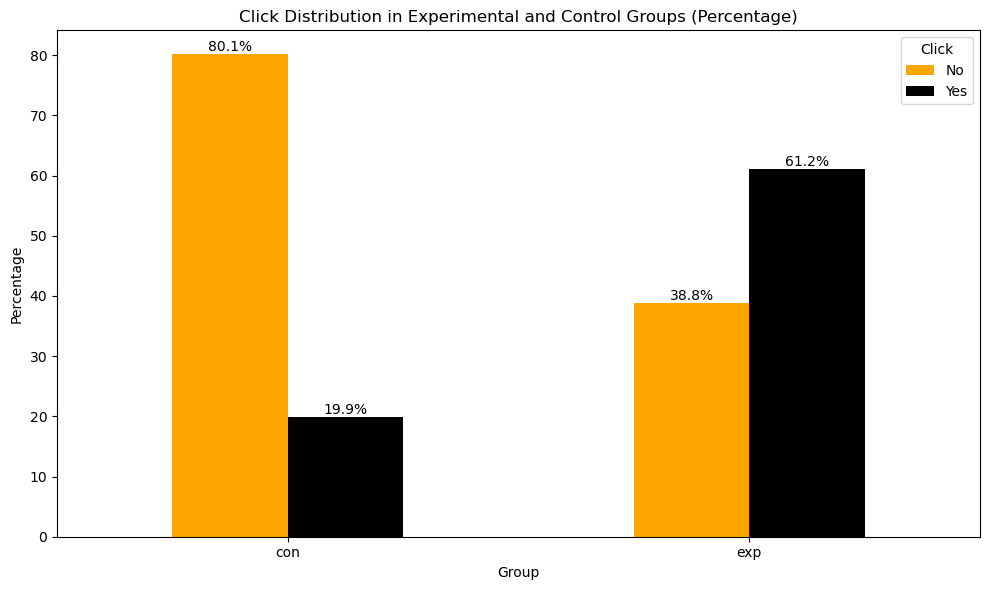

In [15]:
click_normalized = df.groupby('group')['click'].value_counts(normalize=True).unstack()

# Convert the decimals to percentages
click_normalized *= 100

# Plotting the side-by-side bar chart for normalized click distribution
plt.figure(figsize=(10, 6))
ax = click_normalized.plot(kind='bar', color=['orange', 'black'], ax=plt.gca())

# Adding labels and title
plt.title('Click Distribution in Experimental and Control Groups (Percentage)')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Click', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate bars with percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

In [16]:
# Significance Level 
alpha = 0.05

# Minimum Detectable Effect considered for practical significance
delta = 0.1

In [17]:
# Calculating total number of users per group 

N_con = df[df['group'] == 'con'].count().iloc[0]
N_exp = df[df['group'] == 'exp'].count().iloc[0]

# Calculating total number of clicks per group 

X_con = df.groupby('group')['click'].sum().loc['con']
X_exp = df.groupby('group')['click'].sum().loc['exp']

X_con, X_exp, N_con, N_exp

(1989, 6116, 10000, 10000)

In [18]:
p_con = X_con/N_con
p_exp = X_exp/N_exp 

# Calculating the estimate of pooled clicks probability

p_pooled = (X_con + X_exp)/(N_con + N_exp)

# Calculating the estimate of pooled variance

pooled_var = p_pooled*(1-p_pooled)*(1/N_con + 1/N_exp)

print('Click Probability - Control: ', p_con)
print('Click Probability - Experimental: ', p_exp)
print('Pooled Click Probability: ', p_pooled)
print('Pooled Variance: ', pooled_var)

Click Probability - Control:  0.1989
Click Probability - Experimental:  0.6116
Pooled Click Probability:  0.40525
Pooled Variance:  4.82044875e-05


### Type of Hypothesis Test

The type of test that we are going to conduct will be a **Two-Tailed Z Test**.

**Assumption of Normality:** 
- We can assume that our data follows a normal distribution
    
**Homogeneity of Variances:** 
- We can assume that the variances within each group being compared are approximately equal

**Larger Sample Sizes:** 
- The sample size of each group is 10,000. Parametric tests generally perform well with larger sample sizes, where the Central Limit Theorem suggests that the sampling distribution of the mean approaches normality

In [19]:
# Calculating the standard error of the test 

SE = np.sqrt(pooled_var)

# Calculating the test statistics of Z-test

t_stat = (p_con - p_exp)/SE

# Critical Vale of the Z-test 

Z_crit = norm.ppf(1-alpha/2)

print('Standard Error: ', SE)
print('t stat for the Two-Tailed Z Test: ', t_stat)
print('Z-critical value for Standard Normal Distribution: ', Z_crit)

Standard Error:  0.006942945160376826
t stat for the Two-Tailed Z Test:  -59.44163326469381
Z-critical value for Standard Normal Distribution:  1.959963984540054


We can see that the absolute value for test statistic is much larger than our critical value. This gives us an idea that we can reject the null hypothesis at 5% significance level

#### Calculating the p value

* A low p-value (p ≤ 0.05 at 5% significance level) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.
* A high p-value (p > 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.

In [20]:
p_value = 2 * norm.sf(abs(t_stat))

print("p value for the  Two-Tailed Z Test: ", p_value)

p value for the  Two-Tailed Z Test:  0.0


#### Statistical Significance

In [21]:
def statistical_significance(p_value, alpha):
    if p_value <= alpha:
        print("There is statistical significance, indicating that the observed differences between the groups\
are unlikely to have occurred by chance alone.\nThis suggests that the changes in the experimental group\
have a real effect compared to the control group.")
    else: 
        print("There is no statistical significance, suggesting that the observed differences between the groups\
could have occurred by chance.\nThis implies that the changes in the experimental group do not have a substantial\
effect compared to the control group.")

statistical_significance(p_value, alpha)

There is statistical significance, indicating that the observed differences between the groupsare unlikely to have occurred by chance alone.
This suggests that the changes in the experimental grouphave a real effect compared to the control group.


We can reject H_0. There is enough evidence that suggest that p_con is not queal to p_exp. There is a true difference between the experiemntal version of the button vs the control version of the button.

#### Plotting graph for visualisation

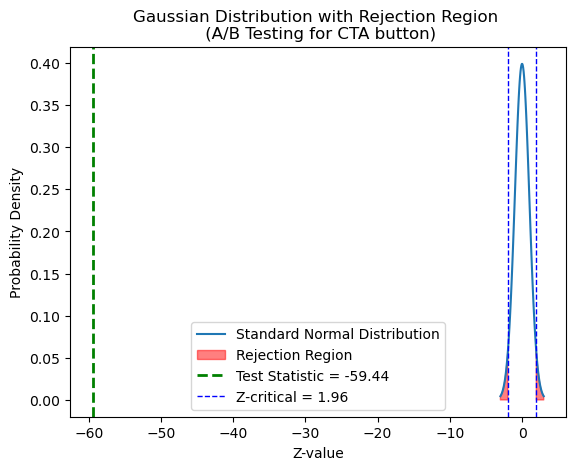

In [22]:
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')
plt.axvline(t_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {t_stat:.2f}')
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for CTA button)')
plt.legend()

plt.show();

#### Confidence Interval (CI) for a 2-sample Z-test

In [23]:
CI = [round((p_exp - p_con) - SE*Z_crit, 3), round((p_exp - p_con) + SE*Z_crit, 3)]

print("Confidence Interval of the 2 sample Z-test is: ", CI)

Confidence Interval of the 2 sample Z-test is:  [0.399, 0.426]


The confidence interval provides a range of values within which the true difference between the experimental and control group proportions is likely to lie with a certain level of confidence (e.g. 95%)

#### Practical Significance

Assessing if the difference between Control and Experimental group is practically significant using the Minimum Detectable Effect (MDE) parameter from the Power Analysis.

In [24]:
def Practically_significant(delta, CI):
    lower_bound_CI = CI[0]

    if delta >= lower_bound_CI:
        print(f"We have practical significance! \nWith MDE of {delta}, The difference between Control and Experimental group is practically significant.")
        return True
    else:
        print("There is no practical significance! \nThe difference between Control and Experimental group is not practically significant.")
        return False

significance = Practically_significant(delta, CI)
print("Lower bound of 95% confidence interval is: ", CI[0])

There is no practical significance! 
The difference between Control and Experimental group is not practically significant.
Lower bound of 95% confidence interval is:  0.399
